In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import json
import numpy as np

In [2]:
with open ('./saved models/finetune_img_aug_vgg16_0.15_1_30_224_results.json') as infile:
    threshold_1 = json.load(infile)

In [3]:
with open ('./saved models/finetune_img_aug_vgg16_0.15_3_30_224_results.json') as infile:
    threshold_3 = json.load(infile)

In [4]:
with open ('./saved models/finetune_img_aug_vgg16_0.15_5_30_224_results.json') as infile:
    threshold_5 = json.load(infile)

In [5]:
with open ('./saved models/finetune_img_aug_vgg16_0.15_7_30_224_results.json') as infile:
    threshold_7 = json.load(infile)

In [6]:
threshold_5.keys()

dict_keys(['epoch_list', 'accuracy', 'val_accuracy', 'val_loss', 'loss'])

In [7]:
#get val acc from dict depends on the loc specified in lst
def getAcc(dct, lst):
    val_acc = []
    for loc in lst:
        val_acc.append(float(dct["val_accuracy"][loc]))
    return val_acc

In [8]:
steps = np.array([1] + list(range(10, 110, 10)))
steps

array([  1,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [9]:
getAcc(threshold_5, steps-1)

[0.5016129016876221,
 0.5516684651374817,
 0.5694295167922974,
 0.5548977255821228,
 0.5349838733673096,
 0.594187319278717,
 0.5505920052528381,
 0.5656620264053345,
 0.5414423942565918,
 0.5710441470146179,
 0.5376749038696289]

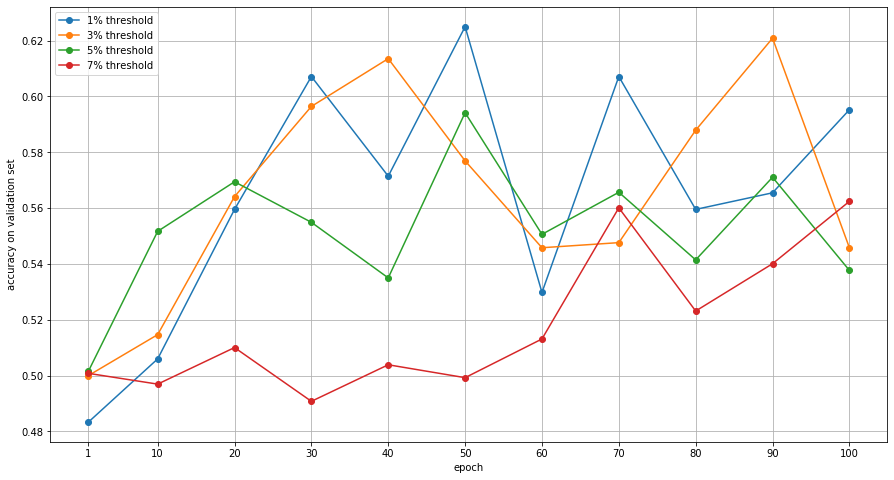

In [10]:
plt.figure(figsize=(15,8))
plt.plot(steps,getAcc(threshold_1, steps-1),"o-",label="1% threshold")
plt.plot(steps,getAcc(threshold_3, steps-1),"o-",label="3% threshold")
plt.plot(steps,getAcc(threshold_5, steps-1),"o-",label="5% threshold")
plt.plot(steps,getAcc(threshold_7, steps-1),"o-",label="7% threshold")
plt.legend(loc=0)
plt.grid()
_ = plt.xlabel("epoch")
_ = plt.ylabel("accuracy on validation set")
_ = plt.xticks(steps)